# 18COC102 -  Advanced Artificial Intelligence Systems - Coursework

<hr>
<p style='color:red'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Experiment D3</p>
<hr>


In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,torch,torchvision

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
CPython 3.6.7
IPython 7.2.0

numpy 1.15.4
torch 0.4.1
torchvision 0.2.1


In [2]:
# import all dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import os
from tensorboardX import SummaryWriter

In [3]:
#implement the network by myself#

#remove pool1 and convA reluA convB reluB
class LeNet2(nn.Module):
    
    def __init__(self):
        
        super(LeNet2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        
        self.convA = nn.Conv2d(6, 10, 8)
        self.reluA = nn.ReLU()
        self.convB = nn.Conv2d(10, 12, 8)
        self.reluB = nn.ReLU()
        
        self.conv2 = nn.Conv2d(12, 16, 5)
        self.relu2 = nn.ReLU()
        self.poo12 = nn.MaxPool2d(2) 
        
        self.fc1   = nn.Linear(16*5*5, 120)
        self.relu3 = nn.ReLU()
        self.fc2   = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3   = nn.Linear(84, 10)

        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.relu1(x)
        
        x = self.convA(x)
        x = self.reluA(x)
        x = self.convB(x)
        x = self.reluB(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.poo12(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)
        
        return x

In [4]:
# parameters
learning_rate=0.001
batch_size=100
epoch=200
workers=2

In [5]:
# set GPU 
device = torch.device("cuda:0")
# set Netwrok
net = LeNet2()
net = net.to(device)
# set optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# set loss function
loss = nn.CrossEntropyLoss()

In [6]:
# dataloader refer source [2]

# load training dataset
trainingset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                           transform=transforms.ToTensor())

trainingloader = torch.utils.data.DataLoader(trainingset, batch_size=batch_size,shuffle=True, 
                                             num_workers=workers)
# load testing dataset
testingset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

testingloader = torch.utils.data.DataLoader(testingset, batch_size=batch_size,
                                         shuffle=False, num_workers=workers)

#end of source [2]
#source [2] https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Files already downloaded and verified
Files already downloaded and verified


In [7]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start training : set net to train model
net.train()

# make two arrays for saving matplotlib data
train_loss = []
train_accu = []
accuracy = 0

# get TersorBoard writer object
writer = SummaryWriter(log_dir='Training')

# Training process
timestart = time.time()
for epoch in range(0,epoch):
    
    # initialize loss,total,correct
    loss_value = 0.0
    total = 0
    correct = 0
    accuracy = 0
    
    # do iteration (total number of training images / batch size) times
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)

        # make gradients to 0
        optimizer.zero_grad()

        # forward step
        outputs = net(inputs)
        
        # compute the loss
        l = loss(outputs, labels)
        
        # backward step
        l.backward()
        
        # optimize step
        optimizer.step()

        # compute loss
        loss_value += l.item()
        
        # save to array in oder to output loss image at the end
        train_loss.append(l.item())
        
        # write to tensorboard file
        writer.add_scalars('/GroupD/Loss', {'D3': l.item()}, epoch)

        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
        accuracy = correct / total * 100.0
        
        # save to array in oder to output accuracy image at the end
        train_accu.append(accuracy)
        
        # write to tensorboard file
        writer.add_scalars('/GroupD/Accuracy', {'D3': accuracy}, epoch)
        

    loss_epoch = loss_value / (500000/batch_size)
    # output the result of this epoch 
    print('[epoch %d]  Loss: %.4f  Accuracy: %.3f %%' %(epoch, loss_epoch , accuracy))

    
# Finish Training
result_training_accuracy = accuracy
result_training_time = (time.time()-timestart)
print('Finished Training! Training process cost %3f sec' %result_training_time)

[epoch 0]  Loss: 0.1934  Accuracy: 27.070 %
[epoch 1]  Loss: 0.1694  Accuracy: 38.064 %
[epoch 2]  Loss: 0.1556  Accuracy: 42.908 %
[epoch 3]  Loss: 0.1490  Accuracy: 45.550 %
[epoch 4]  Loss: 0.1443  Accuracy: 47.702 %
[epoch 5]  Loss: 0.1405  Accuracy: 49.248 %
[epoch 6]  Loss: 0.1366  Accuracy: 50.798 %
[epoch 7]  Loss: 0.1342  Accuracy: 51.860 %
[epoch 8]  Loss: 0.1322  Accuracy: 52.610 %
[epoch 9]  Loss: 0.1294  Accuracy: 53.360 %
[epoch 10]  Loss: 0.1280  Accuracy: 54.244 %
[epoch 11]  Loss: 0.1258  Accuracy: 54.940 %
[epoch 12]  Loss: 0.1242  Accuracy: 55.716 %
[epoch 13]  Loss: 0.1221  Accuracy: 56.318 %
[epoch 14]  Loss: 0.1207  Accuracy: 57.098 %
[epoch 15]  Loss: 0.1187  Accuracy: 57.778 %
[epoch 16]  Loss: 0.1174  Accuracy: 57.824 %
[epoch 17]  Loss: 0.1166  Accuracy: 58.270 %
[epoch 18]  Loss: 0.1148  Accuracy: 59.166 %
[epoch 19]  Loss: 0.1138  Accuracy: 59.542 %
[epoch 20]  Loss: 0.1122  Accuracy: 59.784 %
[epoch 21]  Loss: 0.1112  Accuracy: 60.244 %
[epoch 22]  Loss: 0.

[epoch 181]  Loss: 0.0521  Accuracy: 80.922 %
[epoch 182]  Loss: 0.0529  Accuracy: 80.548 %
[epoch 183]  Loss: 0.0535  Accuracy: 80.220 %
[epoch 184]  Loss: 0.0538  Accuracy: 80.100 %
[epoch 185]  Loss: 0.0528  Accuracy: 80.402 %
[epoch 186]  Loss: 0.0518  Accuracy: 80.910 %
[epoch 187]  Loss: 0.0518  Accuracy: 80.832 %
[epoch 188]  Loss: 0.0511  Accuracy: 81.088 %
[epoch 189]  Loss: 0.0510  Accuracy: 81.010 %
[epoch 190]  Loss: 0.0509  Accuracy: 81.184 %
[epoch 191]  Loss: 0.0533  Accuracy: 80.382 %
[epoch 192]  Loss: 0.0522  Accuracy: 80.690 %
[epoch 193]  Loss: 0.0513  Accuracy: 80.932 %
[epoch 194]  Loss: 0.0511  Accuracy: 81.056 %
[epoch 195]  Loss: 0.0503  Accuracy: 81.410 %
[epoch 196]  Loss: 0.0521  Accuracy: 80.824 %
[epoch 197]  Loss: 0.0525  Accuracy: 80.602 %
[epoch 198]  Loss: 0.0504  Accuracy: 81.384 %
[epoch 199]  Loss: 0.0504  Accuracy: 81.452 %
Finished Training! Training process cost 2620.447855 sec


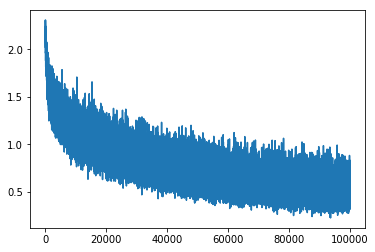

In [8]:
# show the loss
plt.plot(np.arange(len(train_loss)), train_loss)

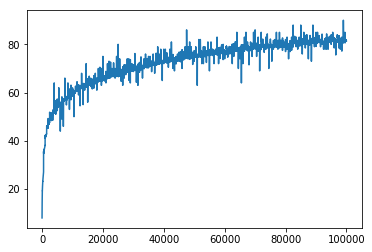

In [9]:
# show the accuracy
plt.plot(np.arange(len(train_accu)), train_accu)

In [10]:
# close the TensorBoard output stream
writer.close()

In [11]:
#ALL THE CODE IN THIS CELL ARE WRITE BY MY SELF#
# Start testing : set net to train model
correct = 0
total = 0

# deactivate the autograd engine
with torch.no_grad():
    
    # do testing iteration
    #for data in testingloader:
        
        # get the input and its label
        #images, labels = data
        #images, labels = images.to(device), labels.to(device)
    for i, (inputs, labels) in enumerate(trainingloader, 0):
        
        # get the input and its label
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # forward step
        outputs = net(inputs)
        
        # compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

# Finish Testing
result_testing_accuracy = correct / total * 100.0
print('The accuracy of the network is %.3f %%' % result_testing_accuracy)

The accuracy of the network is 83.046 %


In [12]:
print('[Configuration]')
print('learning rate = %3f' % learning_rate )
print('batch size = %d' % batch_size )
print('epoch = %d' % epoch )
print('')
print('[Expirement Result]')
print('training time = %3f sec' % result_training_time )
print('training accuracy = %.3f %%' %result_training_accuracy )
print('testing accuracy =  %.3f %%' % (100.0 * correct / total))


[Configuration]
learning rate = 0.001000
batch size = 100
epoch = 199

[Expirement Result]
training time = 2620.447855 sec
training accuracy = 81.452 %
testing accuracy =  83.046 %


<b>click <a href='../Main.ipynb'>here</a> to return to Main.ipynb